# **Gradient Boosting**

## Gradient Boosting: Explanation with Mathematical Intuition and Example

Gradient Boosting is a machine learning technique used for both regression and classification tasks. It builds an ensemble of weak learners, typically decision trees, where each new learner attempts to correct the mistakes of the previous ones by focusing on the residuals (errors).

## **Mathematical Intuition**

### 1. Objective Function:
The main goal of Gradient Boosting is to minimize the loss function by adding weak learners sequentially.

- **For Regression (MSE)**:  
  ```python
  L(y, y_pred) = 0.5 * (y - y_pred)**2
  ```

- **For Classification (Log-Loss)**:  
  ```python
  L(y, y_pred) = -y * log(y_pred) - (1 - y) * log(1 - y_pred)
  ```

### 2. Additive Modeling:
Gradient Boosting builds the model \( F(x) \) by adding learners sequentially:

```python
F(x) = F_0(x) + sum(gamma_m * h_m(x) for m in range(1, M+1))
```
Where:
- \( F_0(x) \) is the initial model.
- \( h_m(x) \) is the weak learner at iteration \( m \).
- \( \gamma_m \) is the learning rate or step size.

### 3. Residuals and Gradient Descent:
Each weak learner is trained to fit the negative gradient (residuals), which is computed as:

```python
residuals = - (dL / dF(x))
```

This means the residual is the gradient of the loss function with respect to the current predictions.

### 4. Learning Rate:
The learning rate \( \gamma_m \) is used to scale the contribution of each learner:

```python
F_new(x) = F_current(x) + gamma_m * h_m(x)
```

---

## **Gradient Boosting Algorithm (Regression Example)**

Let’s consider a small regression example:

| Feature \( x \) | Target \( y \) |
|-----------------|----------------|
| 1               | 1.5            |
| 2               | 3.0            |
| 3               | 4.5            |
| 4               | 6.0            |
| 5               | 7.5            |

We aim to predict \( y \) using Gradient Boosting.

### Step 1: Initialize Model
In regression, the initial model is typically the mean of the target values:

```python
F_0(x) = mean(y)
```
For our dataset:

```python
F_0(x) = 4.5
```

### Step 2: Compute Residuals
The residuals are the difference between the actual target values \( y \) and the predictions \( F_0(x) \):

```python
residuals = y - F_0(x)
```

For the first iteration, residuals are:

| Feature \( x \) | Target \( y \) | Initial Prediction \( F_0(x) \) | Residual \( r_1 \) |
|-----------------|----------------|---------------------------------|--------------------|
| 1               | 1.5            | 4.5                             | -3.0               |
| 2               | 3.0            | 4.5                             | -1.5               |
| 3               | 4.5            | 4.5                             | 0.0                |
| 4               | 6.0            | 4.5                             | 1.5                |
| 5               | 7.5            | 4.5                             | 3.0                |

### Step 3: Fit a Weak Learner
A weak learner (such as a decision tree) is trained to predict the residuals \( r_1 \).

### Step 4: Update the Model
Update the model with the predictions from the weak learner:

```python
F_1(x) = F_0(x) + gamma_1 * h_1(x)
```

Where:
- \( \gamma_1 \) is the learning rate,
- \( h_1(x) \) is the weak learner.

### Step 5: Repeat
The process of computing residuals, fitting a weak learner, and updating the model is repeated for a predefined number of iterations or until convergence.

---

## **Final Model**
The final ensemble model is:

```python
F(x) = F_0(x) + sum(gamma_m * h_m(x) for m in range(1, M+1))
```

---

## **Advantages of Gradient Boosting**

1. **Accuracy**: It produces highly accurate models.
2. **Flexibility**: It can optimize any differentiable loss function.
3. **Handles Non-linear Data**: Can effectively model complex, non-linear relationships.

## **Disadvantages**

1. **Computational Cost**: Can be slow for large datasets.
2. **Overfitting**: May overfit if not properly tuned.

---

## **Python Implementation Example**

Here's an example using the `sklearn` library:

```python
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Sample dataset
X = [[1], [2], [3], [4], [5]]
y = [1.5, 3.0, 4.5, 6.0, 7.5]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred = gb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
```

In this Python implementation, we split a simple dataset into training and testing sets, train a Gradient Boosting Regressor model, and calculate the Mean Squared Error (MSE) to evaluate its performance.

---

## **Conclusion**
Gradient Boosting builds an ensemble of weak learners, where each learner focuses on correcting the errors of the previous ones by fitting the residuals. It is a powerful and flexible algorithm suitable for various tasks, although it requires careful tuning of parameters like the learning rate to avoid overfitting.
```

Import all the required frameworks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Create a data with the random numbers

In [2]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [5]:
df = pd.DataFrame()
df['X'] = X.reshape(100)
df['y'] = y

In [6]:
df

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986
...,...,...
95,-0.006204,-0.040675
96,0.022733,-0.002305
97,-0.072459,0.032809
98,-0.474581,0.689516


Text(0.5, 1.0, 'X vs Y')

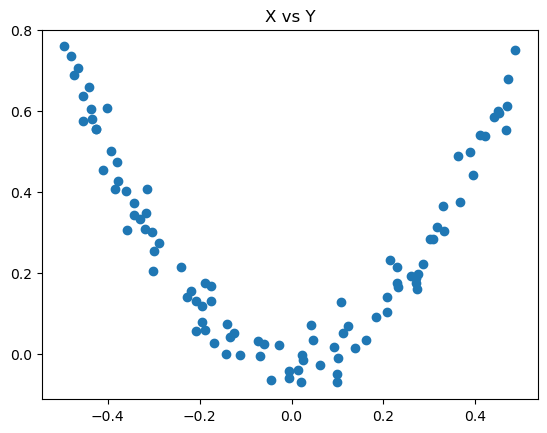

In [7]:
plt.scatter(df['X'],df['y'])
plt.title('X vs Y')

Step 1: m1(predictions as the mean of the target values)

In [8]:
df['pred1'] = df['y'].mean()

In [9]:
df

,X,y,pred1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458
...,...,...,...
95,-0.006204,-0.040675,0.265458
96,0.022733,-0.002305,0.265458
97,-0.072459,0.032809,0.265458
98,-0.474581,0.689516,0.265458


Psuedoresiduals = difference between the target and the actual values

In [10]:
df['res1'] = df['y'] - df['pred1']

In [11]:
df

,X,y,pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


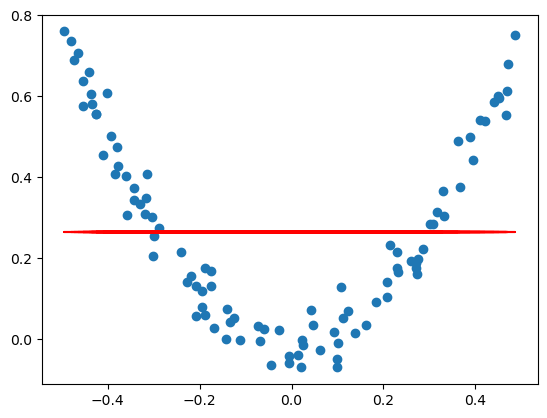

In [12]:
plt.scatter(df['X'],df['y'])
plt.plot(df['X'],df['pred1'],color='red')

In [13]:
from sklearn.tree import DecisionTreeRegressor

In [14]:
tree1 = DecisionTreeRegressor(max_leaf_nodes=8)

The target of the decision tree(m2) is the res1 (residuals of the previous predictor)

In [15]:
tree1.fit(df['X'].values.reshape(100,1),df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

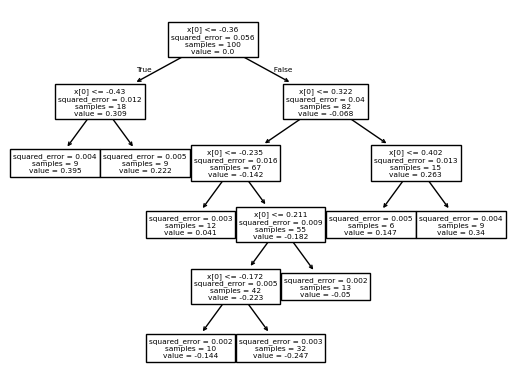

In [16]:
from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()

In [17]:
# generating X_test
X_test = np.linspace(-0.5, 0.5, 500)

In [18]:
y_pred = 0.265458 + tree1.predict(X_test.reshape(500, 1))

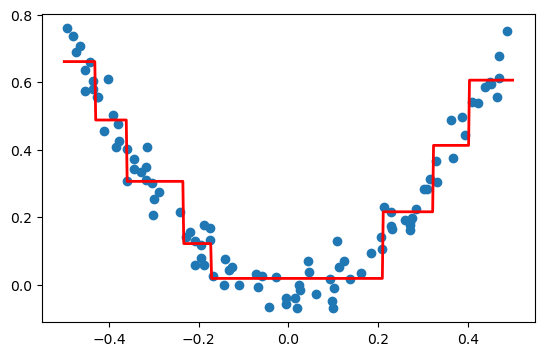

In [19]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])

In [20]:
df['pred2'] = 0.265458 + tree1.predict(df['X'].values.reshape(100,1))

In [21]:
df

,X,y,pred1,res1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319
1,0.450714,0.594480,0.265458,0.329021,0.605884
2,0.231994,0.166052,0.265458,-0.099407,0.215784
3,0.098658,-0.070178,0.265458,-0.335636,0.018319
4,-0.343981,0.343986,0.265458,0.078528,0.305964
...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319
96,0.022733,-0.002305,0.265458,-0.267763,0.018319
97,-0.072459,0.032809,0.265458,-0.232650,0.018319
98,-0.474581,0.689516,0.265458,0.424057,0.660912


In [22]:
df['res2'] = df['y'] - df['pred2']

In [23]:
df

,X,y,pred1,res1,pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319,0.033254
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732
3,0.098658,-0.070178,0.265458,-0.335636,0.018319,-0.088497
4,-0.343981,0.343986,0.265458,0.078528,0.305964,0.038022
...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319,-0.058994
96,0.022733,-0.002305,0.265458,-0.267763,0.018319,-0.020624
97,-0.072459,0.032809,0.265458,-0.232650,0.018319,0.014489
98,-0.474581,0.689516,0.265458,0.424057,0.660912,0.028604


In [24]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)

In model (m3), res2 is the target value for a given decision tree

In [25]:
tree2.fit(df['X'].values.reshape(100,1),df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [26]:
y_pred = 0.265458 + sum(regressor.predict(X_test.reshape(-1, 1)) for regressor in [tree1,tree2])

Text(0.5, 1.0, 'X vs y')

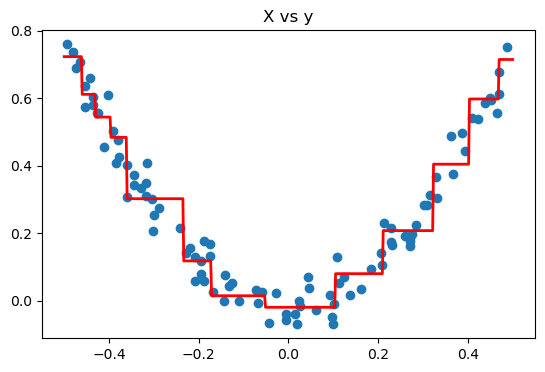

In [27]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])
plt.title('X vs y')

Conclusion: Here, we have intentionally used 3 models (m1 -> mean of target, m2 -> target is the res1 and m3 -> target is the res2)

## **Gradient Boosting for Classification**

Gradient Boosting is an ensemble technique that builds models sequentially. In classification, Gradient Boosting creates a series of weak learners (typically decision trees) where each model corrects the errors of its predecessor by minimizing the residual error using gradient descent.

### Motivation Behind Gradient Boosting:

1. **Weak Learners**: Each weak learner performs only slightly better than random guessing.
2. **Boosting**: By focusing on the mistakes of the previous learners, subsequent models improve upon them.

Gradient Boosting fits a new model to the residual errors (differences between true labels and predictions) from the previous model. The goal is to minimize the error by applying gradient descent on a loss function, such as log loss for classification.

### Steps of Gradient Boosting:

1. **Initialization**: Start with an initial model (like a decision stump) that predicts the mean or majority class for all instances.
2. **Compute Residuals**: Calculate the residuals, which represent the error in prediction made by the previous model.
3. **Train a New Model**: Train a new model to predict these residuals.
4. **Update**: Add the prediction of the new model to the original model's predictions with a step size (learning rate).
5. **Repeat**: Repeat the process iteratively for multiple weak learners until convergence.

### Loss Function for Classification:

In classification, the loss function used is often **log loss** or **exponential loss**. For a binary classification, log loss is given by:

```python
L(y, p) = -(y * log(p) + (1 - y) * log(1 - p))
```
where:
- \( y \) is the actual class (0 or 1),
- \( p \) is the predicted probability for class 1.

### Mathematically:

Given a dataset \( \{(x_i, y_i)\}_{i=1}^n \), where \( x_i \) is the input and \( y_i \) is the true label, the objective is to minimize the overall loss \( L(y, f(x)) \) over all data points.

At each iteration \( m \), a weak learner \( h_m(x) \) is trained to predict the negative gradient (residual errors).

The final model is the weighted sum of all weak learners:

```python
F(x) = F_0(x) + \sum_{m=1}^M \alpha_m h_m(x)
```
Where:
- \( F_0(x) \) is the initial prediction,
- \( h_m(x) \) is the weak learner at iteration \( m \),
- \( \alpha_m \) is the weight/learning rate.

### Example of Gradient Boosting for Classification in Python:

Let's implement gradient boosting for classification using **scikit-learn's** `GradientBoostingClassifier`.

#### Example:

```python
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model
gb_clf.fit(X_train, y_train)

# Make predictions
y_pred = gb_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
```

### How it works:

1. **Dataset**: We generate a synthetic binary classification dataset.
2. **Model**: `GradientBoostingClassifier` from `sklearn.ensemble` is used. Parameters like `n_estimators` (number of weak learners) and `learning_rate` control the training.
3. **Prediction and Evaluation**: The model is trained on the training set and evaluated on the test set. The accuracy metric is used to assess the performance.

### Key Parameters of Gradient Boosting:

- **n_estimators**: The number of boosting stages or weak learners.
- **learning_rate**: Controls the contribution of each weak learner. Lower values make learning slower but more accurate.
- **max_depth**: Maximum depth of the individual trees.

### Advantages of Gradient Boosting:

1. **High Accuracy**: It can achieve better accuracy than a single model.
2. **Flexibility**: Can be used for both regression and classification tasks.
3. **Feature Importance**: It provides insight into the relative importance of each feature.

### Limitations:

1. **Prone to Overfitting**: Especially if the number of estimators is too large.
2. **Training Time**: Can be slow due to the sequential nature of boosting.
3. **Sensitive to Hyperparameters**: Requires careful tuning of parameters like learning rate and the number of estimators.

### Conclusion:

Gradient Boosting for classification is a powerful and flexible model that improves weak learners' performance by focusing on errors made by previous models. By iteratively reducing errors, it achieves higher predictive accuracy than individual models like decision trees.

## **Gradient Boosting Classification Implementation**

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [31]:
data = load_iris()
# print(data)

In [32]:
## independent features - X, target feature - y
X, y = data.data, data.target
# print(X)
# print(y)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier()

Task: Perform hyperparameter tuning via GridSearchCV or RandomizedSearchCV and compare the performance of this model vs the model created after hyperparameter tuning

### **Model Prediction**

In [35]:
y_pred = model.predict(X_test)
print(y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Data Modeling: GradientBoostingRegressor**

In [37]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [38]:
housing = fetch_california_housing()
X = housing.data
y = housing.target

**Data Splitting: Split the data into independent features and target values**

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
print(y_train)

[1.03  3.821 1.726 ... 2.221 2.835 3.25 ]


**Data Modeling**

In [41]:
model_reg = GradientBoostingRegressor()
model_reg.fit(X_train, y_train)

GradientBoostingRegressor()

In [42]:
y_pred_reg = model_reg.predict(X_test)
print(y_pred_reg)

[0.50518761 1.09334601 4.24570956 ... 4.68181295 0.85329537 1.96275219]


**Model Evaluation**

In [43]:
mse = mean_squared_error(y_test, y_pred_reg)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.29393470011606526
